In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

In [7]:
#display info
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [13]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [15]:
customers.dtypes
products.dtypes
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [17]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [19]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [21]:
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [23]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [25]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [27]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [29]:
# mearge the data sets to analysis

data=transactions.merge(customers,on='CustomerID',how='left').merge(products,on='ProductID',how='left')

In [31]:
data.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
CustomerName        object
Region              object
SignupDate          object
ProductName         object
Category            object
Price_y            float64
dtype: object

In [33]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## Exploratory Data Analysis(EDA)

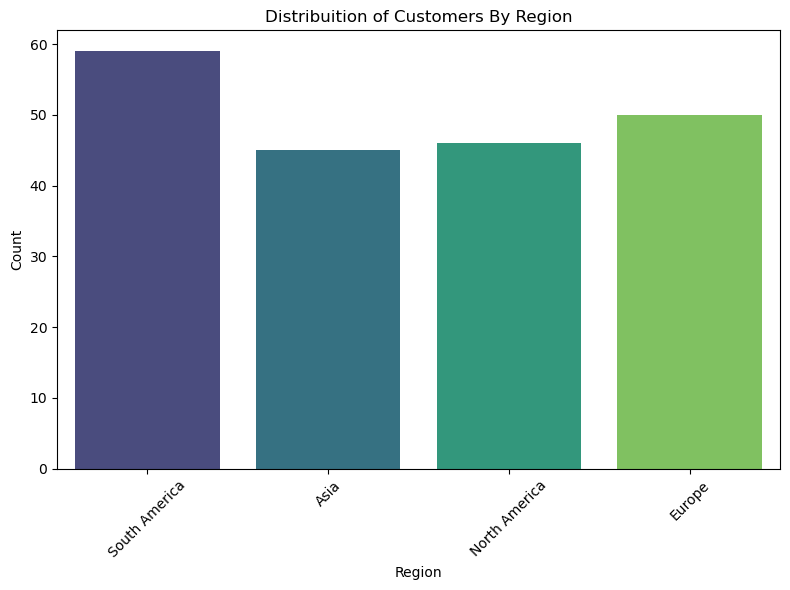

In [44]:
#Customers by region  analysis

plt.figure(figsize=(8,6))
sns.countplot(data=customers,x='Region',palette='viridis',hue='Region',dodge=False,legend=False)
plt.title('Distribuition of Customers By Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#top 10 popular products
pds=data['ProductName'].value_counts().head(10)
pds

ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
HomeSense Desk Lamp      28
ActiveWear Jacket        26
TechPro Textbook         25
TechPro T-Shirt          24
ActiveWear Textbook      23
Name: count, dtype: int64

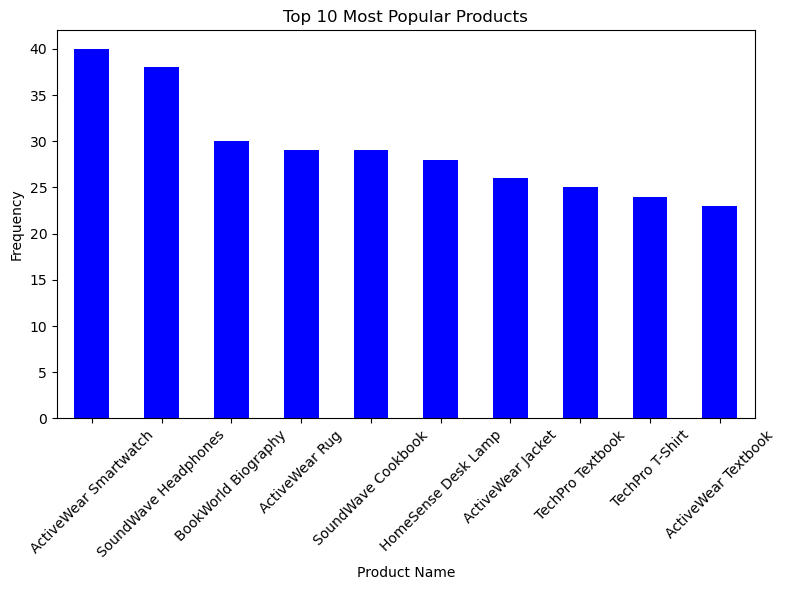

In [48]:


#top 10 products analysis
plt.figure(figsize=(8,6))
pds.plot(kind='bar',color='blue')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
#slaes trends over time

data['TransactionDate']=pd.to_datetime(data['TransactionDate'])
data['MonthYear']=data['TransactionDate'].dt.to_period('M')
sales_trends=data.groupby('MonthYear')['TotalValue'].sum()

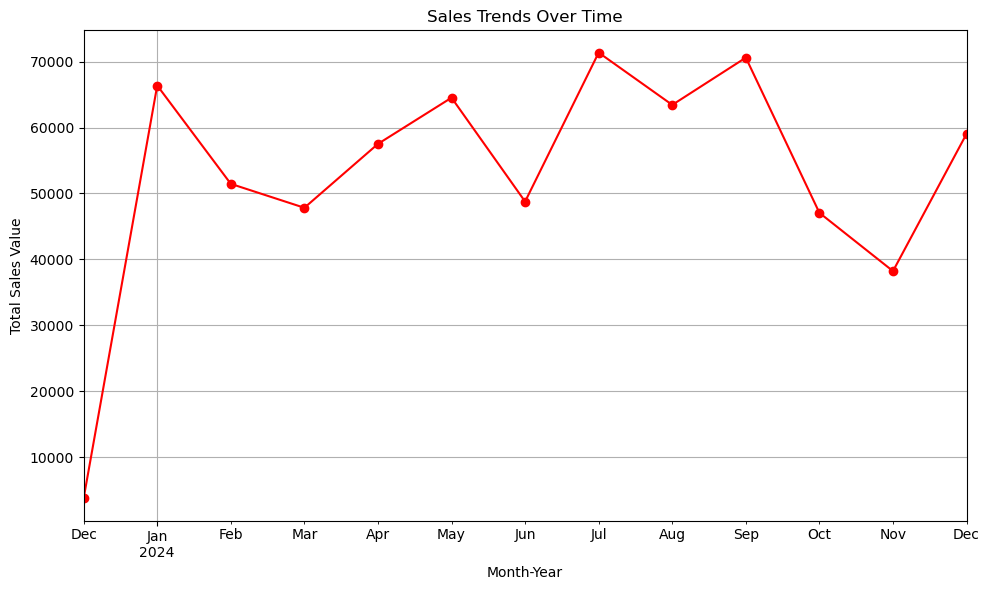

In [54]:
plt.figure(figsize=(10,6))
sales_trends.plot(kind='line',marker='o',color='red')
plt.title('Sales Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.grid()
plt.tight_layout()
plt.show()

In [56]:
rev_by_region=data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

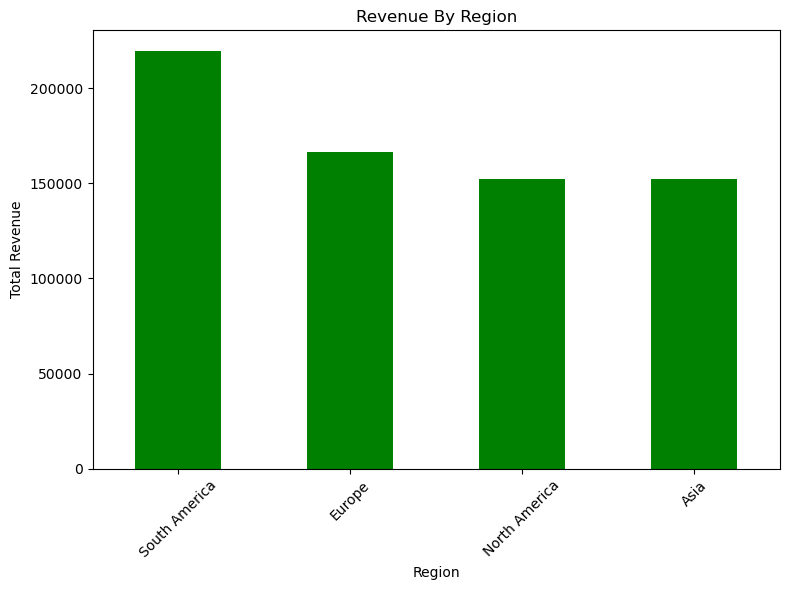

In [58]:
plt.figure(figsize=(8,6))
rev_by_region.plot(kind='bar',color='green')
plt.title('Revenue By Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
data.to_csv('merged_data.csv',index=False)